<a href="https://colab.research.google.com/github/coronarita/TIL/blob/main/Keras_Ch2_20240516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

신경망 구조

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28*28))
test_images = test_images / 255.0

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2657 - accuracy: 0.9228
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1089 - accuracy: 0.9677
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0714 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0521 - accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0385 - accuracy: 0.9889


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 89ms/step


array([2.79619372e-09, 4.08983336e-09, 8.20134392e-06, 9.84100188e-06,
       1.24239586e-11, 1.77479862e-08, 1.65787495e-13, 9.99981463e-01,
       3.87705619e-08, 3.26532103e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99998146

In [ ]:
test_labels[0]

7

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test accuracy:{test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9802
test accuracy:0.9801999926567078


# 신경망을 위한 데이터 표현

## Scalar(0dim)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

## Vector(1dim)

In [ ]:
x = np.array([5,1,3,5])
x

array([5, 1, 3, 5])

In [ ]:
x.ndim

1

## Matrix(2dim)

In [ ]:
x = np. array([[1,2,3],
               [4,5,6],
               [7,8,9]

])
x.ndim

2

## Tensor(3dim)

In [ ]:
x = np.array([
    [
        [1, 2, 3],
        [4,5,6],
        [7,8,9],
    ],
    [
        [11, 12, 13],
        [14,15,16],
        [17,18,19],
    ],
    [
        [21, 22, 23],
        [24,25,26],
        [27,28,29],
    ],
])
x.ndim

3

## 핵심 속성

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
type(train_images)

numpy.ndarray

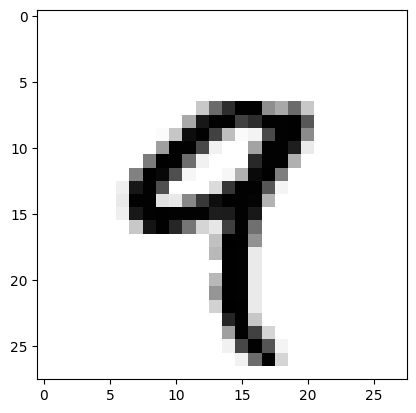

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

# 넘파이로 텐서 조작

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
myslice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :28, :28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

## 배치 데이터

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n: 128 *(n+1)]

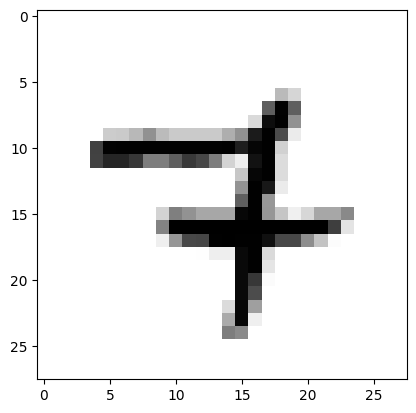

In [ ]:
plt.imshow(batch[0], cmap=plt.cm.binary)

신경망의 톱니바퀴 : 텐서 연산

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i,j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.03 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 2.64 s


In [ ]:
# Broadcasting
X = np.random.random((32, 10))
y = np.random.random((10,
))

In [ ]:
y.shape

(10,)

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
y.shape # shape가 변했음.

(1, 10)

In [ ]:
y

array([[0.34584   , 0.83095972, 0.78368534, 0.08911724, 0.94688456,
        0.54671439, 0.31862475, 0.1068627 , 0.08883261, 0.47396189]])

In [ ]:
Y = np.concatenate([y for _ in range(32)], axis=0)
Y.shape

(32, 10)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
# Tensor multiply
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

5.619957899081369

In [ ]:
# 텐서 크기변환
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images.shape

(60000, 784)

In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))
x.shape

(300, 20)

In [ ]:

x = np.transpose(x)
x.shape

(20, 300)

In [ ]:
# gradient tape
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2*x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2*x +3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
# Matrix

W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [ ]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.0406584, 1.0406584],
        [1.1188911, 1.1188911]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [ ]:
W

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.5316098 , 0.17701459],
       [0.72727334, 0.4523996 ]], dtype=float32)>

In [ ]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5260558 , 0.11939824],
       [0.51460254, 0.9994929 ]], dtype=float32)>

In [ ]:
import tensorflow as tf

# 변수 생성
W = tf.Variable([[1.0, 2.0], [3.0, 4.0]])
b = tf.Variable([1.0, 1.0])
x = tf.constant([[1.0, 2.0], [3.0, 4.0]])

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])


In [ ]:
# 출력
print("Gradient with respect to W:")
print(grad_of_y_wrt_W_and_b[0])

print("Gradient with respect to b:")
print(grad_of_y_wrt_W_and_b[1])


Gradient with respect to W:
tf.Tensor(
[[4. 4.]
 [6. 6.]], shape=(2, 2), dtype=float32)
Gradient with respect to b:
tf.Tensor([2. 2.], shape=(2,), dtype=float32)


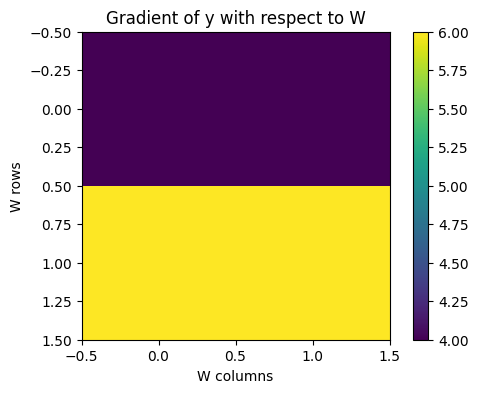

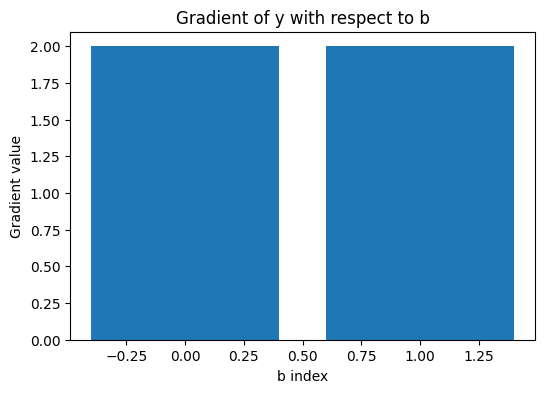

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 변수 생성
W = tf.Variable([[1.0, 2.0], [3.0, 4.0]])
b = tf.Variable([1.0, 1.0])
x = tf.constant([[1.0, 2.0], [3.0, 4.0]])

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

# W에 대한 그라디언트 시각화
grad_W = grad_of_y_wrt_W_and_b[0].numpy()
plt.figure(figsize=(6, 4))
plt.imshow(grad_W, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Gradient of y with respect to W")
plt.xlabel("W columns")
plt.ylabel("W rows")
plt.show()

# b에 대한 그라디언트 시각화
grad_b = grad_of_y_wrt_W_and_b[1].numpy()
plt.figure(figsize=(6, 4))
plt.bar(np.arange(len(grad_b)), grad_b)
plt.title("Gradient of y with respect to b")
plt.xlabel("b index")
plt.ylabel("Gradient value")
plt.show()

# 첫 번째 예제 다시보기

In [ ]:
# Simple Dense

import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size, )
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    # 데코레이터로, 속성처럼 사용 가능 (예 : dense_layers.weights()가 아니라, dense_layers.weights로)
    # 속성처럼 접근할 수 있어서 직관적임
    # 메서드를 통해 접근하여, 캡슐화 유지

    @property
    def weights(self):
        return [self.W, self.b]

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights # [] + [1,2] +[3,4]
        return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [ ]:
assert len(model.weights) == 4

In [ ]:
# Batch Generator
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self): # for Generator
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [ ]:
# Train Step

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions
        )
        average_loss = tf.reduce_mean(per_sample_losses) # reduce_mean : 텐서의 샘플 별 손실값의 평균 계산 - 배치 전체의 평균손실 구한다.
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

In [ ]:
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=learning_rate)
def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"epoch{epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter %100 == 0:
                print(f"{batch_counter}번째 배치 손실:{loss:.2f}")

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


In [ ]:
fit(model, train_images, train_labels, epochs=10, batch_size=128)

epoch0
0번째 배치 손실:7.48
100번째 배치 손실:2.24
200번째 배치 손실:2.21
300번째 배치 손실:2.09
400번째 배치 손실:2.22
epoch1
0번째 배치 손실:1.93
100번째 배치 손실:1.89
200번째 배치 손실:1.84
300번째 배치 손실:1.71
400번째 배치 손실:1.84
epoch2
0번째 배치 손실:1.61
100번째 배치 손실:1.59
200번째 배치 손실:1.52
300번째 배치 손실:1.43
400번째 배치 손실:1.52
epoch3
0번째 배치 손실:1.35
100번째 배치 손실:1.35
200번째 배치 손실:1.25
300번째 배치 손실:1.22
400번째 배치 손실:1.28
epoch4
0번째 배치 손실:1.15
100번째 배치 손실:1.17
200번째 배치 손실:1.05
300번째 배치 손실:1.05
400번째 배치 손실:1.11
epoch5
0번째 배치 손실:1.00
100번째 배치 손실:1.03
200번째 배치 손실:0.91
300번째 배치 손실:0.93
400번째 배치 손실:0.99
epoch6
0번째 배치 손실:0.89
100번째 배치 손실:0.92
200번째 배치 손실:0.80
300번째 배치 손실:0.84
400번째 배치 손실:0.90
epoch7
0번째 배치 손실:0.80
100번째 배치 손실:0.84
200번째 배치 손실:0.72
300번째 배치 손실:0.77
400번째 배치 손실:0.83
epoch8
0번째 배치 손실:0.74
100번째 배치 손실:0.77
200번째 배치 손실:0.66
300번째 배치 손실:0.71
400번째 배치 손실:0.78
epoch9
0번째 배치 손실:0.68
100번째 배치 손실:0.72
200번째 배치 손실:0.61
300번째 배치 손실:0.67
400번째 배치 손실:0.74


In [ ]:
# model evaluation

pred = model(test_images)
pred = pred.numpy()

In [ ]:
pred_labels = np.argmax(pred, axis=1)
matches = pred_labels == test_labels
print(f"Accuracy: {matches.mean():.2f}")

Accuracy: 0.82


In [ ]:
ㄹ